# **Practice Building a CNN with PyTorch**
Practice by building a CNN for a binary classification task of telling 1s vs 0s.

In [87]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F


**Get the MNIST image set for training**

In [88]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loadewr = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

Check if the images are good and labeled.

training set:


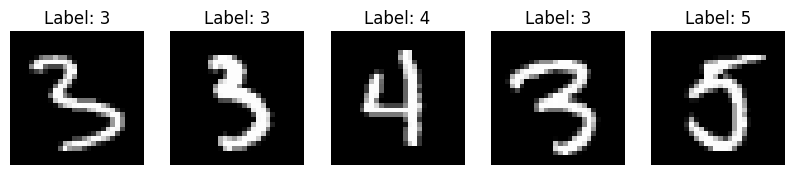

testing set:


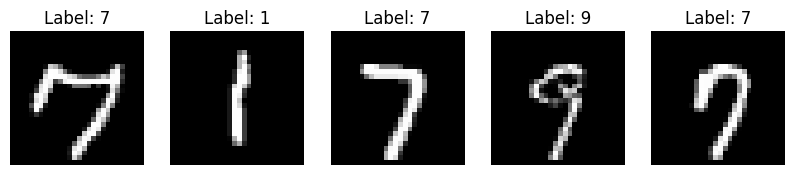

In [89]:
def visualize_batch(images, labels, n=5):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.show()

print("training set:")
dataiter = iter(train_loader)
images, labels = next(dataiter)
visualize_batch(images, labels, n=5)
print("testing set:")
dataiter = iter(train_loader)
images, labels = next(dataiter)
visualize_batch(images, labels, n=5)

Since we want to keep it simple with just 0s and 1s, time to filter.

In [90]:
from torch.utils.data import TensorDataset, DataLoader

# Your filter function
def filter_01(labels, dataset):
    indices = (labels == 0) | (labels == 1)
    labels = labels[indices]
    dataset = dataset[indices]
    return labels, dataset

train_labels, train_data = filter_01(train_dataset.targets, train_dataset.data)
test_labels, test_data = filter_01(test_dataset.targets, test_dataset.data)

# Create TensorDataset objects
train_dataset_filtered = TensorDataset(train_data.unsqueeze(1).float(), train_labels)
test_dataset_filtered = TensorDataset(test_data.unsqueeze(1).float(), test_labels)

# Create DataLoader objects
train_loader = DataLoader(train_dataset_filtered, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset_filtered, batch_size=64, shuffle=False)


training set:


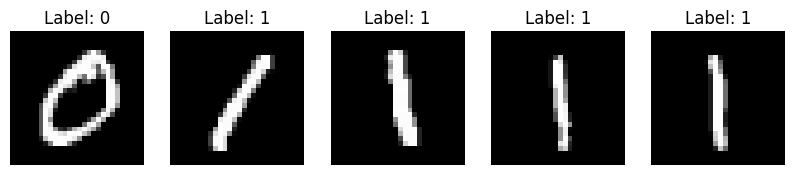

testing set:


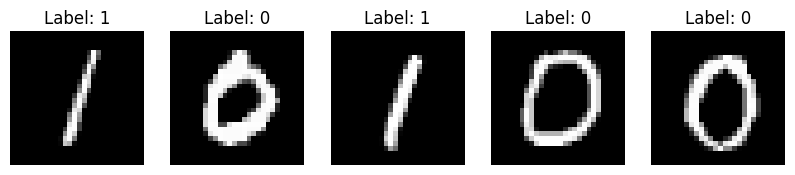

In [91]:
print("training set:")
visualize_batch(train_data, train_labels, n=5)
print("testing set:")
visualize_batch(test_data, test_labels, n=5)

# Initilize the layers

In [92]:
class BinaryCNN(nn.Module):
    def __init__(self):
        super(BinaryCNN, self).__init__()
        self.relu = nn.ReLU()  # ReLU as a module
        # Create a convolution layer with 1 input channels, 16 filters, 3x3 kernel size
        self.conv1 = nn.Conv2d(1, 16, 3)
        # Create a max pooling layer with 3x3 kernel
        self.pool1 = nn.MaxPool2d(3, 3)
        # Create a convolution layer with 32 input channels, 64 filters, 3x3 kernel size
        self.conv2 = nn.Conv2d(16, 64, 3)
        # Create a max pooling layer with 3x3 kernel
        self.pool2 = nn.MaxPool2d(2, 2)

        # Now do the Fully connected layers
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

        # Add a 20% drop out
        self.dropout = nn.Dropout(0.2)

    # Complete the forwarding function
    def forward(self, x):
        # Convolution and Activation (Layer 1)
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        # Convolution and Activation (Layer 2)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        # Flattening
        x = x.view(-1, 64 * 3 * 3)
        # Fully Connected Layers with Dropout
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        # Final Output Layer
        x = self.fc3(x)
        return x


# Loss Function and Optimizer:

In [93]:
# Use Stochastic Gradient Descent as we learned in class
model = BinaryCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


# Train the Model!

In [94]:
# Use loops like in the assignments, with a set epoch value

num_epochs = 10  # Number of epochs

for epoch in range(num_epochs):
    # Complete the loop
    for data, labels in train_loader:
        outputs = model(data)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0143
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0038
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000


# Evaluation

In [95]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total}%')


Accuracy of the model on the test images: 100.0%
